# IMPORTS

- pandas -> data manipulation
- sqlalchemy -> database connection
- pymysql -> mysql connector
- openpyxl -> handling excel files

Welp, looks like there were several issues we had to deal with: 
- First the lib <mark>mysql-connector</mark> does not work nicely with the version of MySQL (v9.2) I am running. Anything over 8.0 starting using a new authentication type (caching_sha2_password). Had to uninstall my-connector, and install <mark>my-connector-python</mark>. 
- Even after installing the new lib the issues persisted. I eventually closed everything, deleted my venv and recreated it. That seems to fix the issue. 

In [12]:
import pandas as pd
#import sqlalchemy
#import pymysql
import openpyxl

# Connect to local DB

Using the dotenv lib to keep my user/password secret and not accidently commit to github. Even though we are working with a Docker image locally. 

In [17]:
import os
from dotenv import load_dotenv
import mysql.connector

load_dotenv()

db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = "127.0.0.1"
db_name = "data_science"
engine = mysql.connector.connect(user=db_user, password=db_password, host=db_host, database=db_name)

#cur = engine.cursor()

#cur.execute("SELECT CURDATE()")
#row = cur.fetchone()

#print("Current Date is: {0}".format(row[0]))

In [24]:
df_csv = pd.read_csv("data\dog_license_2017_data.csv")
print(df.head())

df_csv.to_sql(name="dog_license_2017_data", con=engine, if_exists="replace", index=False)
#print("Data migrated successfully!")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Justin\AppData\Local\Temp\ipykernel_32480\77534793.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_csv = pd.read_csv("data\dog_license_2017_data.csv")


                                      LicenseType         Breed  \
0                    Dog Individual Spayed Female  BICHON FRISE   
1  Dog Senior Citizen or Disability Spayed Female     CHIHUAHUA   
2                    Dog Individual Spayed Female       LAB MIX   
3                             Dog Individual Male     DACHSHUND   
4                    Dog Individual Spayed Female     DACHSHUND   

               Color  DogName  OwnerZip  ExpYear        ValidDate  
0              WHITE    CHLOE     15090     2017  12/15/2016 9:58  
1  WHITE/BLACK/BROWN  CHALUPA     15120     2017  3/23/2017 14:32  
2             YELLOW      MIA     15133     2017  2/28/2017 10:59  
3   BLACK/BROWN/GREY     CODY     15108     2017   2/9/2017 13:40  
4              BLACK   SOPHIE     15108     2017   2/9/2017 13:40  


21727

Welp looks like more issues. Seems Pandas DF only likes to work with certain lib. Trying again with sqlalchemy and pymysql

In [25]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

engine = create_engine("mysql+pymysql://" + db_user + ":" + db_password + "@" + db_host + "/" + db_name)
df_csv.to_sql('dog_license_2017_data', con = engine, if_exists = 'replace',index = False)

21727

In [28]:
query = "SELECT * FROM dog_license_2017_data;"
df_licenses = pd.read_sql(query, engine)
print(df_licenses.head())

                                      LicenseType         Breed  \
0                    Dog Individual Spayed Female  BICHON FRISE   
1  Dog Senior Citizen or Disability Spayed Female     CHIHUAHUA   
2                    Dog Individual Spayed Female       LAB MIX   
3                             Dog Individual Male     DACHSHUND   
4                    Dog Individual Spayed Female     DACHSHUND   

               Color  DogName  OwnerZip  ExpYear        ValidDate  
0              WHITE    CHLOE     15090     2017  12/15/2016 9:58  
1  WHITE/BLACK/BROWN  CHALUPA     15120     2017  3/23/2017 14:32  
2             YELLOW      MIA     15133     2017  2/28/2017 10:59  
3   BLACK/BROWN/GREY     CODY     15108     2017   2/9/2017 13:40  
4              BLACK   SOPHIE     15108     2017   2/9/2017 13:40  


In [29]:
df_licenses.describe()

,OwnerZip,ExpYear
count,21727.000000,21727.0
mean,15152.795968,2017.0
std,85.874782,0.0
min,15003.000000,2017.0
25%,15102.000000,2017.0
50%,15137.000000,2017.0
75%,15227.000000,2017.0
max,16229.000000,2017.0


In [30]:
df_licenses.dropna(inplace=True)
df_licenses.describe()

,OwnerZip,ExpYear
count,21527.000000,21527.0
mean,15152.746597,2017.0
std,85.975201,0.0
min,15003.000000,2017.0
25%,15102.000000,2017.0
50%,15137.000000,2017.0
75%,15227.000000,2017.0
max,16229.000000,2017.0


In [31]:
df_licenses["Breed"]

0              BICHON FRISE
1                 CHIHUAHUA
2                   LAB MIX
3                 DACHSHUND
4                 DACHSHUND
                ...        
21722                 BOXER
21723                 MIXED
21724    LABRADOR RETRIEVER
21725          GER SHEPHERD
21726             CHIHUAHUA
Name: Breed, Length: 21527, dtype: object

In [45]:
breeds = df_licenses["Breed"].unique()
breeds.size

265

In [47]:
breed_counts = df_licenses["Breed"].value_counts()
print(breed_counts)

Breed
MIXED                 2287
LABRADOR RETRIEVER    1366
LAB MIX               1181
GER SHEPHERD           742
GOLDEN RETRIEVER       689
                      ... 
PYRENEAN MASTIFF         1
BERGAMASCO               1
PUMI                     1
CAROLINA DOG             1
JINDO                    1
Name: count, Length: 265, dtype: int64


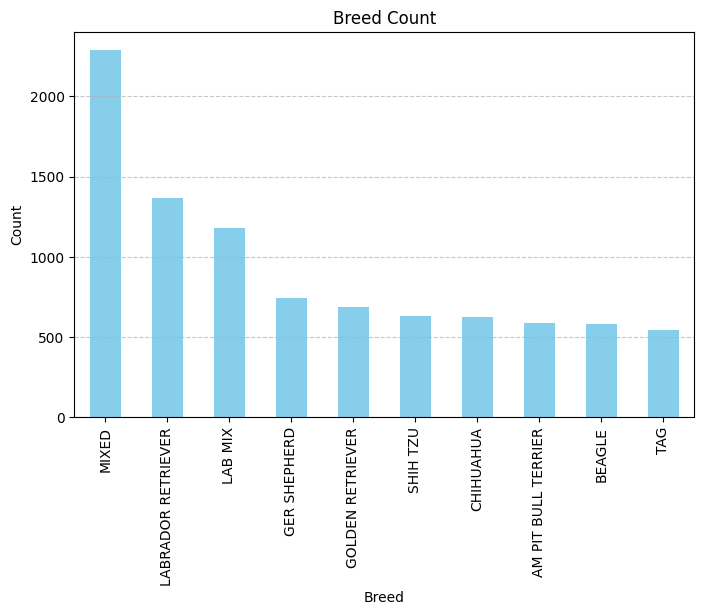

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_ten = breed_counts.head(10)
top_ten.plot(kind="bar", color="skyblue")

plt.title("Breed Count")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [53]:
top_ten

Breed
MIXED                  2287
LABRADOR RETRIEVER     1366
LAB MIX                1181
GER SHEPHERD            742
GOLDEN RETRIEVER        689
SHIH TZU                632
CHIHUAHUA               624
AM PIT BULL TERRIER     586
BEAGLE                  578
TAG                     544
Name: count, dtype: int64